# 서울시 CCTV 분석

---
# 1. 데이터 준비
- cctv, 인구수 데이터는 각각 xlsx파일과 csv파일로 준비
- cctv 파일 위치 : /Users/taeheon/eda_study/data/data01/01.Seoul_CCTV.xlsx
- 인구수 데이터 파일 위치 : /Users/taeheon/eda_study/data/data01/01.Seoul_Population.csv

---
## 2. 서울시 구별 인구수 데이터
- csv파일
- 데이터 위치 : /Users/taeheon/eda_study/data/data01/01.Seoul_Population.csv

### 데이터 불러오기

In [1]:
import pandas as pd

pop_Seoul = pd.read_csv("../data/data01/01.Seoul_Population.csv")
pop_Seoul.head()

,동별(1),동별(2),2024 2/4,2024 2/4.1,2024 2/4.2,2024 2/4.3,2024 2/4.4,2024 2/4.5,2024 2/4.6,2024 2/4.7,2024 2/4.8,2024 2/4.9,2024 2/4.10,2024 2/4.11
0,동별(1),동별(2),세대 (세대),계 (명),계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
1,동별(1),동별(2),소계,소계,남자,여자,소계,남자,여자,소계,남자,여자,소계,소계
2,합계,소계,4486014,9619861,4634458,4985403,9366283,4524862,4841421,253578,109596,143982,2.09,1785286
3,합계,종로구,72394,150204,71684,78520,139189,67005,72184,11015,4679,6336,1.92,29338
4,합계,중구,65273,131800,63383,68417,121475,58582,62893,10325,4801,5524,1.86,26516


### 인구수 데이터프레임 column 확인하기

In [2]:
pop_Seoul.columns

Index(['동별(1)', '동별(2)', '2024 2/4', '2024 2/4.1', '2024 2/4.2', '2024 2/4.3',
       '2024 2/4.4', '2024 2/4.5', '2024 2/4.6', '2024 2/4.7', '2024 2/4.8',
       '2024 2/4.9', '2024 2/4.10', '2024 2/4.11'],
      dtype='object')

### 2행을 헤더로 지정하여 다시 csv 파일을 불러오자

In [3]:
pop_Seoul = pd.read_csv("../data/data01/01.Seoul_Population.csv", header=2)
pop_Seoul.head()

,동별(1),동별(2),소계,소계.1,남자,여자,소계.2,남자.1,여자.1,소계.3,남자.2,여자.2,소계.4,소계.5
0,합계,소계,4486014,9619861,4634458,4985403,9366283,4524862,4841421,253578,109596,143982,2.09,1785286
1,합계,종로구,72394,150204,71684,78520,139189,67005,72184,11015,4679,6336,1.92,29338
2,합계,중구,65273,131800,63383,68417,121475,58582,62893,10325,4801,5524,1.86,26516
3,합계,용산구,104187,219451,105752,113699,206061,98564,107497,13390,7188,6202,1.98,39021
4,합계,성동구,133233,283853,136993,146860,276597,133939,142658,7256,3054,4202,2.08,50534


### 필요한 컬럼만 지정해서 불러오자
- 필요한 컬럼 : 동별(2), 소계.1, 소계.2, 소계.3, 소계.5

In [4]:
pop_Seoul = pd.read_csv("../data/data01/01.Seoul_Population.csv", header=2, usecols=['동별(2)', '소계.1', '소계.2', '소계.3', '소계.5'])
pop_Seoul.head()

,동별(2),소계.1,소계.2,소계.3,소계.5
0,소계,9619861,9366283,253578,1785286
1,종로구,150204,139189,11015,29338
2,중구,131800,121475,10325,26516
3,용산구,219451,206061,13390,39021
4,성동구,283853,276597,7256,50534


### 0번 인덱스 행 삭제
- 0번 인덱스 행 값은 필요 없을 것 같으니 해당 행은 drop

In [5]:
pop_Seoul.drop(index=0, inplace=True)
pop_Seoul.head()

,동별(2),소계.1,소계.2,소계.3,소계.5
1,종로구,150204,139189,11015,29338
2,중구,131800,121475,10325,26516
3,용산구,219451,206061,13390,39021
4,성동구,283853,276597,7256,50534
5,광진구,350005,334159,15846,58307


### 컬럼명을 깔끔하게 변경하자
- 소계.1 = 한국인 + 외국인 남녀 소계
- 소계.2 = 한국인 남녀 소계
- 소계.3 = 외국인 남녀 소계
- 소계.5 = 65세이상 고령자 소계

In [6]:
pop_Seoul.rename(columns={'동별(2)':'구별',
                          '소계.1':'인구수',
                          '소계.2':'한국인',
                          '소계.3':'외국인',
                          '소계.5':'고령자'}
                          , inplace=True)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,150204,139189,11015,29338
2,중구,131800,121475,10325,26516
3,용산구,219451,206061,13390,39021
4,성동구,283853,276597,7256,50534
5,광진구,350005,334159,15846,58307


### 어느 구의 인구수가 가장 많을까?

In [7]:
pop_Seoul.sort_values(['인구수'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자
24,송파구,658768,652752,6016,111724
16,강서구,565133,559335,5798,105023
23,강남구,562136,556570,5566,89719
11,노원구,500045,495183,4862,98515
21,관악구,497632,481145,16487,87267


---
## 3. 서울시 구별 cctv 현황 데이터
- xlsx파일
- 데이터 위치 : /Users/taeheon/eda_study/data/01.Seoul_Population.csv

### 데이터 불러오기

In [8]:
CCTV_Seoul = pd.read_excel("../data/data01/01.Seoul_CCTV.xlsx")
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,150204,139189,11015,29338
2,중구,131800,121475,10325,26516
3,용산구,219451,206061,13390,39021
4,성동구,283853,276597,7256,50534
5,광진구,350005,334159,15846,58307


### cctv 데이터프레임 column 확인하기

In [9]:
CCTV_Seoul.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

### 2행을 헤더로 지정하여 다시 excel파일을 불러오자

In [10]:
CCTV_Seoul = pd.read_excel("../data/data01/01.Seoul_CCTV.xlsx", header=2)
CCTV_Seoul.head()

,Unnamed: 0,순번,구분,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년\n6.30.
0,NaN,NaN,계,102380,11692,8225,10865,10652,12854,11838,9558,9218,13919,3559
1,NaN,1.0,종로구,2290,230,100,140,140,66,233,85,219,919,158
2,NaN,2.0,중 구,3021,376,220,366,381,155,357,414,137,135,480
3,NaN,3.0,용산구,3300,106,295,491,147,335,473,486,413,492,62
4,NaN,4.0,성동구,4514,542,278,939,457,640,483,366,233,471,105


In [11]:
CCTV_Seoul.columns

Index(['Unnamed: 0', '순번', '구분', '총 계', '2016년 이전 설치된 CCTV ', '2016년', '2017년',
       '2018년', '2019년', '2020년', '2021년', '2022년', '2023년', '2024년\n6.30.'],
      dtype='object')

### 필요한 컬럼만 지정해서 다시 불러오자
- 필요없는 컬럼 : Unnamed ~, 순번

In [18]:
use_cols = ['구분', '총 계', '2016년 이전 설치된 CCTV ', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '2023년', '2024년\n6.30.']
CCTV_Seoul = pd.read_excel("../data/data01/01.Seoul_CCTV.xlsx", header=2, usecols=use_cols)


CCTV_Seoul.head()

,구분,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년\n6.30.
0,계,102380,11692,8225,10865,10652,12854,11838,9558,9218,13919,3559
1,종로구,2290,230,100,140,140,66,233,85,219,919,158
2,중 구,3021,376,220,366,381,155,357,414,137,135,480
3,용산구,3300,106,295,491,147,335,473,486,413,492,62
4,성동구,4514,542,278,939,457,640,483,366,233,471,105


### 컬럼명 변경
- '2024년\n6.30' -> '2024년'
- '구분' -> '구별'

In [19]:
CCTV_Seoul = CCTV_Seoul.rename(columns={'구분' : '구별', '2024년\n6.30.' : '2024년'})

CCTV_Seoul.head()

,구별,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,계,102380,11692,8225,10865,10652,12854,11838,9558,9218,13919,3559
1,종로구,2290,230,100,140,140,66,233,85,219,919,158
2,중 구,3021,376,220,366,381,155,357,414,137,135,480
3,용산구,3300,106,295,491,147,335,473,486,413,492,62
4,성동구,4514,542,278,939,457,640,483,366,233,471,105


### 0번 인덱스 행 삭제

In [20]:
CCTV_Seoul.drop(index=0, inplace=True)


CCTV_Seoul.head()

,구별,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
1,종로구,2290,230,100,140,140,66,233,85,219,919,158
2,중 구,3021,376,220,366,381,155,357,414,137,135,480
3,용산구,3300,106,295,491,147,335,473,486,413,492,62
4,성동구,4514,542,278,939,457,640,483,366,233,471,105
5,광진구,4156,403,42,666,460,712,191,740,273,340,329


### '최근증가율' 컬럼 추가
- 2016년 이전 설치된 cctv 현황 대비 2016년 이후부터 2024년까지의 cctv개수 현황

In [21]:
CCTV_Seoul['최근증가율'] = ((CCTV_Seoul['2016년'] + CCTV_Seoul['2017년'] + CCTV_Seoul['2018년'] + CCTV_Seoul['2019년'] + CCTV_Seoul['2020년'] + CCTV_Seoul['2021년'] + CCTV_Seoul['2022년'] + CCTV_Seoul['2023년'] + CCTV_Seoul['2024년']) / CCTV_Seoul['2016년 이전 설치된 CCTV '] * 100)

CCTV_Seoul.head()

,구별,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,최근증가율
1,종로구,2290,230,100,140,140,66,233,85,219,919,158,895.652174
2,중 구,3021,376,220,366,381,155,357,414,137,135,480,703.457447
3,용산구,3300,106,295,491,147,335,473,486,413,492,62,3013.207547
4,성동구,4514,542,278,939,457,640,483,366,233,471,105,732.841328
5,광진구,4156,403,42,666,460,712,191,740,273,340,329,931.265509


---
## 4. 데이터 합치기

### 두 데이터프레임의 공통 column 확인하기

In [22]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자
1,종로구,150204,139189,11015,29338


In [23]:
CCTV_Seoul.head(1)

,구별,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,최근증가율
1,종로구,2290,230,100,140,140,66,233,85,219,919,158,895.652174


In [69]:
pop_Seoul['구별']

1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
Name: 구별, dtype: object

In [70]:
CCTV_Seoul['구별']

1      종로구
2      중 구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
Name: 구별, dtype: object

- pop_Seoul의 중구와 CCTV_Seoul의 중 구는 띄워쓰기 때문에 서로 다른 값으로 되어있다,
- 이를 위해 CCTV_Seoul의 중 구를 중구로 바꾸어주자

In [82]:
CCTV_Seoul.iloc[1, 0] = '중구'

### '구별' 컬럼 기준으로 merge

In [83]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년,최근증가율,인구수,한국인,외국인,고령자
0,종로구,2290,230,100,140,140,66,233,85,219,919,158,895.652174,150204,139189,11015,29338
1,중구,3021,376,220,366,381,155,357,414,137,135,480,703.457447,131800,121475,10325,26516
2,용산구,3300,106,295,491,147,335,473,486,413,492,62,3013.207547,219451,206061,13390,39021
3,성동구,4514,542,278,939,457,640,483,366,233,471,105,732.841328,283853,276597,7256,50534
4,광진구,4156,403,42,666,460,712,191,740,273,340,329,931.265509,350005,334159,15846,58307


In [84]:
data_result['구별']

0      종로구
1       중구
2      용산구
3      성동구
4      광진구
5     동대문구
6      중랑구
7      성북구
8      강북구
9      도봉구
10     노원구
11     은평구
12    서대문구
13     마포구
14     양천구
15     강서구
16     구로구
17     금천구
18    영등포구
19     동작구
20     관악구
21     서초구
22     강남구
23     송파구
24     강동구
Name: 구별, dtype: object

### 연도별 cctv 개수 컬럼 삭제

In [85]:
data_result.drop(['2016년 이전 설치된 CCTV ', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '2023년', '2024년'], axis=1, inplace=True)

data_result.head()

,구별,총 계,최근증가율,인구수,한국인,외국인,고령자
0,종로구,2290,895.652174,150204,139189,11015,29338
1,중구,3021,703.457447,131800,121475,10325,26516
2,용산구,3300,3013.207547,219451,206061,13390,39021
3,성동구,4514,732.841328,283853,276597,7256,50534
4,광진구,4156,931.265509,350005,334159,15846,58307


### '구별' 컬럼 인덱스로 지정

In [86]:
data_result.set_index('구별', inplace=True)

data_result.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자
구별,,,,,,
종로구,2290,895.652174,150204,139189,11015,29338
중구,3021,703.457447,131800,121475,10325,26516
용산구,3300,3013.207547,219451,206061,13390,39021
성동구,4514,732.841328,283853,276597,7256,50534
광진구,4156,931.265509,350005,334159,15846,58307


### 각 데이터간의 상관관계를 분석해보자

In [87]:
data_result.corr()

,총 계,최근증가율,인구수,한국인,외국인,고령자
총 계,1.000000,-0.330403,0.538558,0.528907,0.072782,0.419682
최근증가율,-0.330403,1.000000,-0.160511,-0.146728,-0.269175,-0.012451
인구수,0.538558,-0.160511,1.000000,0.998963,-0.226113,0.947257
한국인,0.528907,-0.146728,0.998963,1.000000,-0.270222,0.950147
외국인,0.072782,-0.269175,-0.226113,-0.270222,1.000000,-0.297042
고령자,0.419682,-0.012451,0.947257,0.950147,-0.297042,1.000000


### 인구수 대비 cctv 개수의 비율을 계산해보자

In [88]:
data_result['CCTV비율'] = (data_result['총 계'] / data_result['인구수']) * 100

data_result.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
종로구,2290,895.652174,150204,139189,11015,29338,1.524593
중구,3021,703.457447,131800,121475,10325,26516,2.292109
용산구,3300,3013.207547,219451,206061,13390,39021,1.503753
성동구,4514,732.841328,283853,276597,7256,50534,1.590260
광진구,4156,931.265509,350005,334159,15846,58307,1.187412


### cctv 비율이 높은 순서대로 데이터를 확인해보자

In [89]:
data_result.sort_values(by='CCTV비율', ascending=False).head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
중구,3021,703.457447,131800,121475,10325,26516,2.292109
성동구,4514,732.841328,283853,276597,7256,50534,1.590260
종로구,2290,895.652174,150204,139189,11015,29338,1.524593
용산구,3300,3013.207547,219451,206061,13390,39021,1.503753
강남구,7721,419.582773,562136,556570,5566,89719,1.373511


---
# 5. 데이터 시각화

### matplotlib 모듈 import

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 떄문에 한글이 깨질 수 있어 설정
rc("font", family="Arial Unicode MS")

In [91]:
data_result.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
종로구,2290,895.652174,150204,139189,11015,29338,1.524593
중구,3021,703.457447,131800,121475,10325,26516,2.292109
용산구,3300,3013.207547,219451,206061,13390,39021,1.503753
성동구,4514,732.841328,283853,276597,7256,50534,1.590260
광진구,4156,931.265509,350005,334159,15846,58307,1.187412


### '총 계' 컬럼만 시각화해보자

<Axes: title={'center': '가장 CCTV가 많은 구'}, ylabel='구별'>

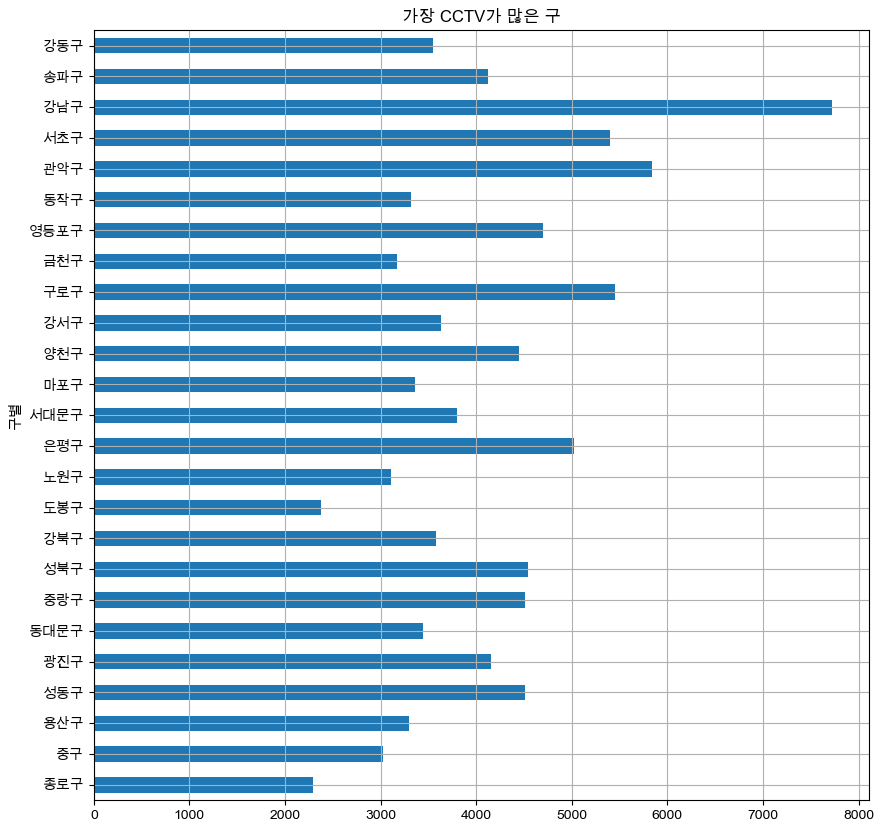

In [92]:
data_result['총 계'].plot(kind='barh',
                       grid=True,
                       title='가장 CCTV가 많은 구',
                       figsize=(10, 10))

- 눈에 잘 안 들어오니 오름차순으로 정렬해 다시 plot해보자

<Axes: title={'center': '가장 CCTV가 많은 구'}, ylabel='구별'>

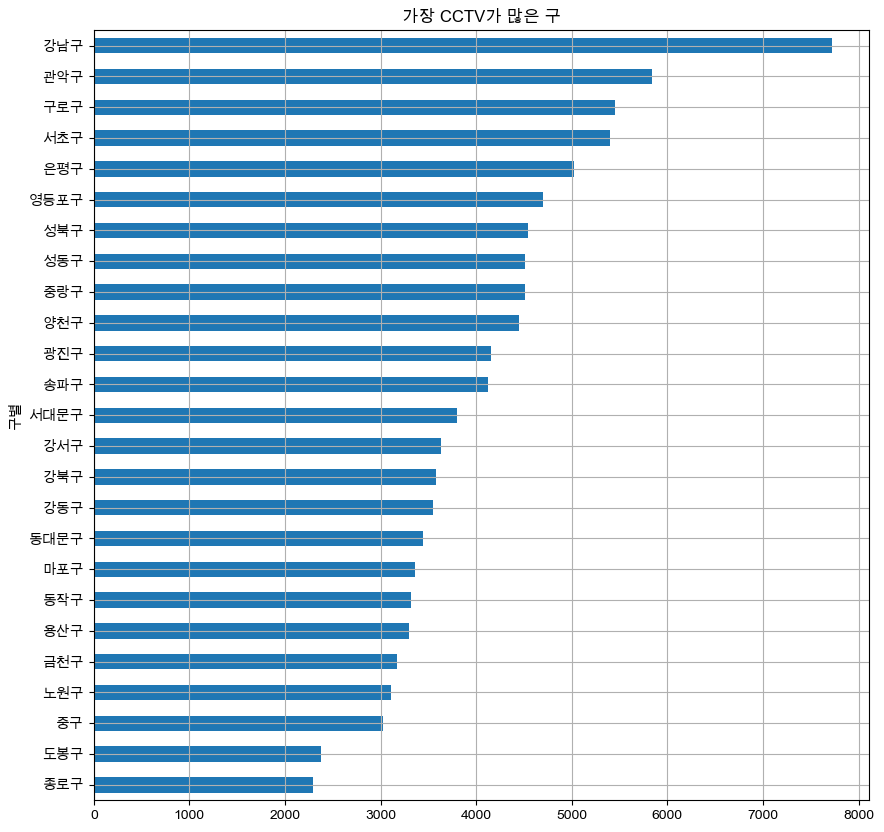

In [93]:
data_result['총 계'].sort_values().plot(kind='barh',
                                      grid=True,
                                      title='가장 CCTV가 많은 구',
                                      figsize=(10,10))

### 'CCTV비율' 컬럼 시각화

In [94]:
data_result.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
종로구,2290,895.652174,150204,139189,11015,29338,1.524593
중구,3021,703.457447,131800,121475,10325,26516,2.292109
용산구,3300,3013.207547,219451,206061,13390,39021,1.503753
성동구,4514,732.841328,283853,276597,7256,50534,1.590260
광진구,4156,931.265509,350005,334159,15846,58307,1.187412


<Axes: title={'center': '인구 대비 CCTV비율이 가장 높은 구'}, ylabel='구별'>

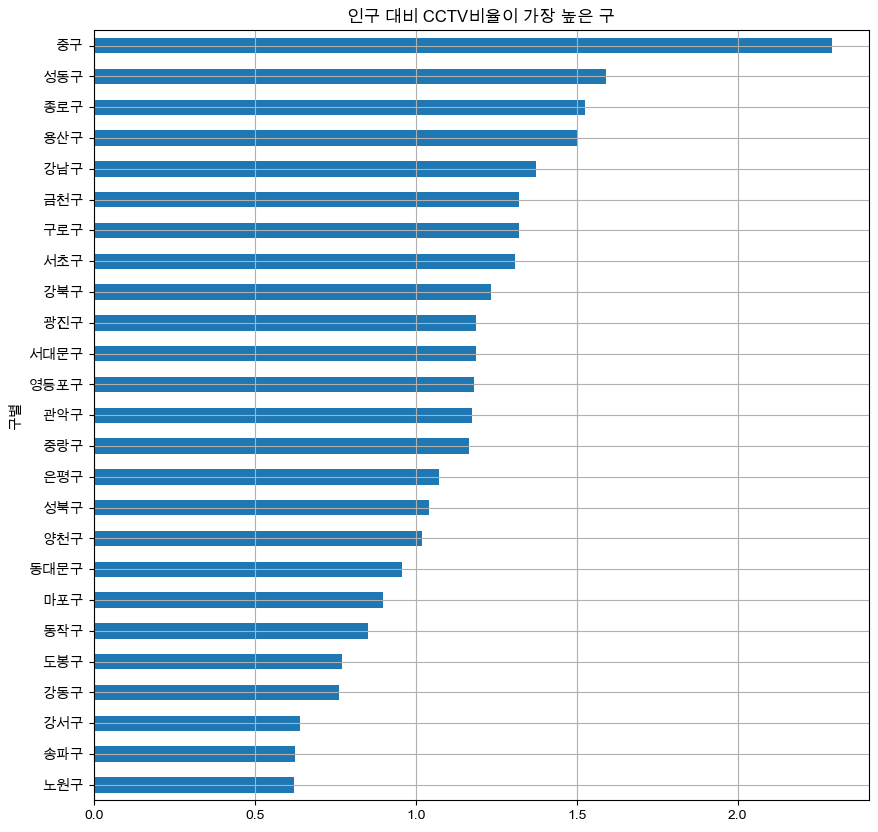

In [95]:
data_result['CCTV비율'].sort_values().plot(kind='barh',
                                         grid=True,
                                         title='인구 대비 CCTV비율이 가장 높은 구',
                                         figsize=(10,10))

---
## 6. 데이터 경향을 파악하고 시각화하기
- 인구수와 cctv개수의 관계를 선형으로 표현하여 데이터의 trend를 파악

In [96]:
data_result.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
종로구,2290,895.652174,150204,139189,11015,29338,1.524593
중구,3021,703.457447,131800,121475,10325,26516,2.292109
용산구,3300,3013.207547,219451,206061,13390,39021,1.503753
성동구,4514,732.841328,283853,276597,7256,50534,1.590260
광진구,4156,931.265509,350005,334159,15846,58307,1.187412


### '인구수'와 '총 계' 컬럼으로 scatter plot 그리기

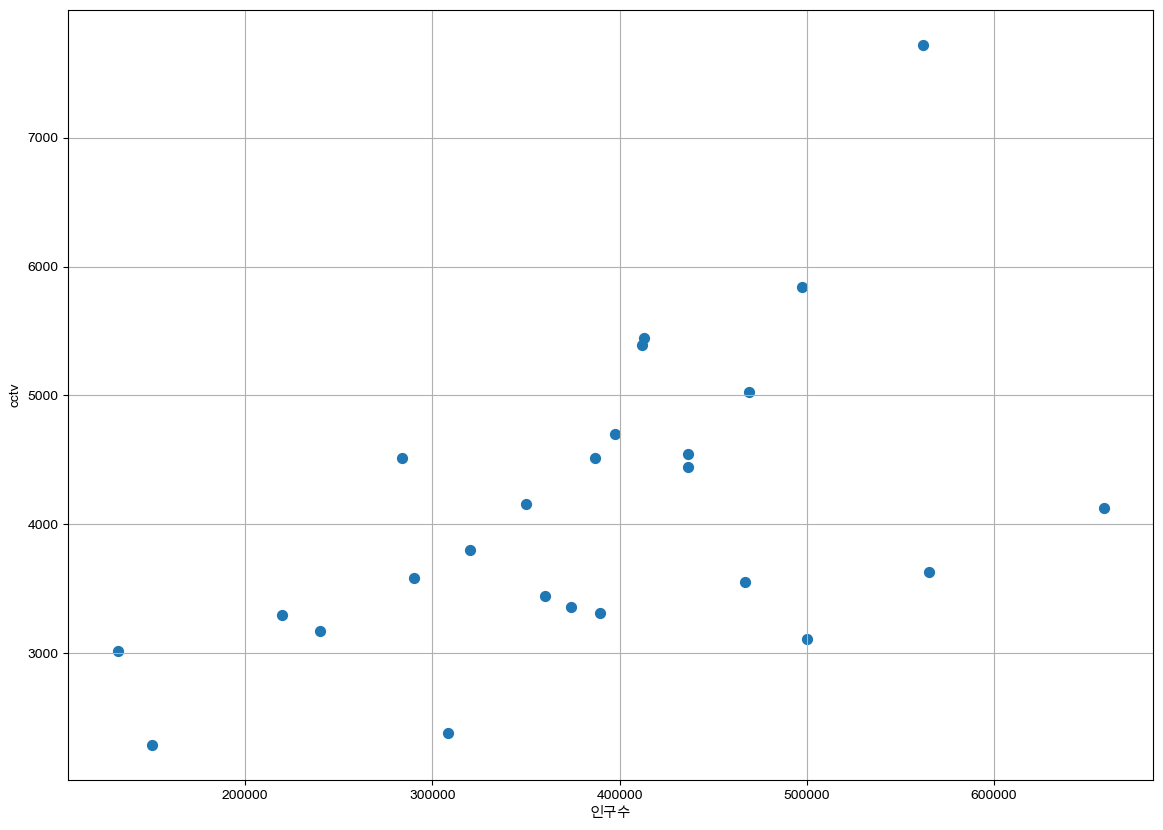

In [97]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['총 계'], s=50)  # x축=인구수, y축='총 계', s=점 사이즈
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid(True)
plt.show()

### 데이터 경향선(선형회귀) 그리기
- 인구수와 cctv개수 데이터 사이의 경향을 파악하기 위해 두 데이터의 관계를 선형으로 표현해보자
- numpy를 이용한 1차 직선을 그려보자

#### np.polyfit(x, y, 차수) : 직선을 구성하기 위한 계수를 계산
- 결과값 : 차수 + 1만큼의 길이의 숫자 배열
- 이 숫자들은 n차식 계수부터 차례대로 1차씩 내려가며 상수항의 계수까지를 의미

#### np.poly1d() : polyfit으로 찾은 숫자들을 계수로하는 1차식 함수로 만들어주는 기능

In [98]:
# 예시
# x^2 + 2x + 3 만들기
import numpy as np

poly_func = np.poly1d([1, 2, 3])

poly_func

poly1d([1, 2, 3])

In [99]:
# 위 다항식의 x에 3을 대입
print(f'x에 3대입 : {poly_func(3)}')

x에 3대입 : 18


#### 인구수, 총 계를 각각 x,y로 하는 1차 직선 만들기

- numpy의 polyfit 메서드를 활용하여 1차식의 계수 생성

In [100]:
fp1 = np.polyfit(data_result['인구수'], data_result['총 계'], 1)

fp1

array([5.05600993e-03, 2.14967549e+03])

numpy의 poly1d 메서드를 활용하여 1차식의 함수 생성

In [101]:
f1 = np.poly1d(fp1)

f1

poly1d([5.05600993e-03, 2.14967549e+03])

- 인구수가 40만정도일 때 cctv 개수는?

In [102]:
f1(400000)

4172.079462327228

### scatter plot을 그린 그래프 위에 1차식을 시각화해보자

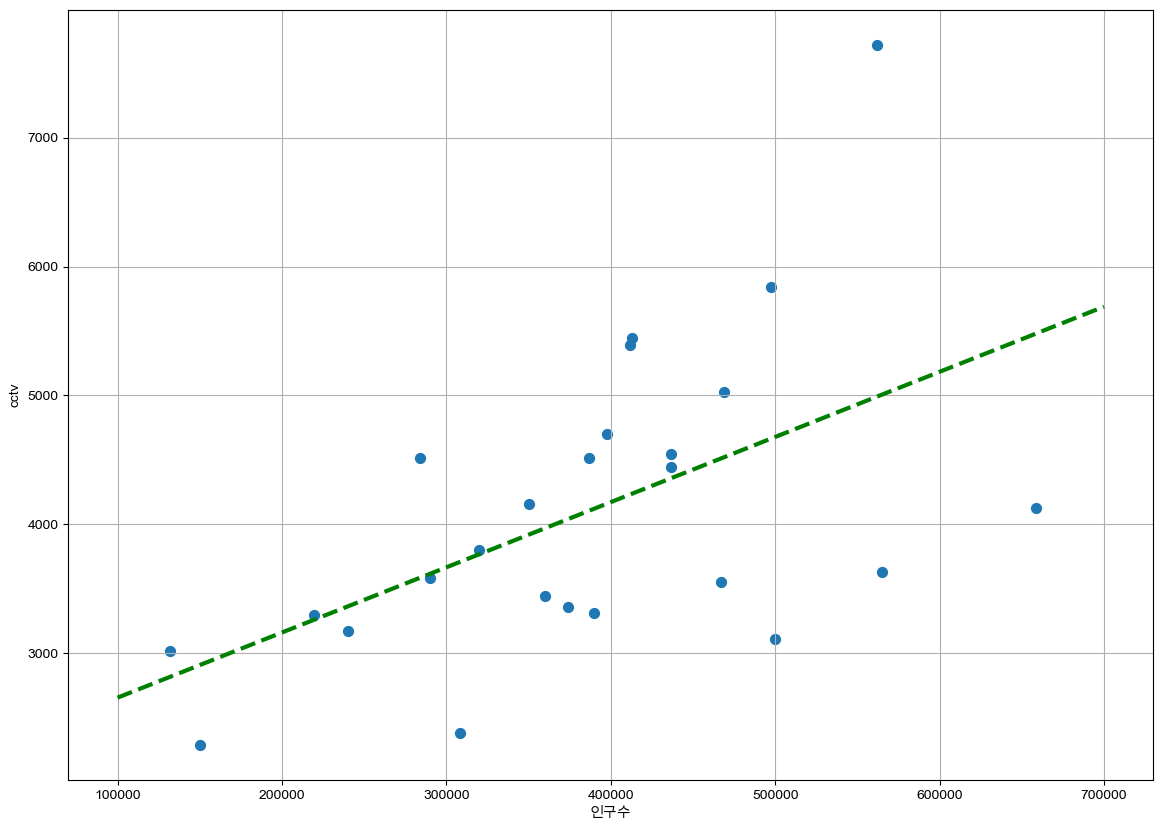

In [103]:
# 1차식의 x 값 범위 지정
# 10만명 ~ 70만명 정도로 설정
fx = np.linspace(100000, 700000, 100)

# 1차식의 y 값
fy = f1(fx)

# 그래프 그리기
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['총 계'], s=50)  # x축=인구수, y축='총 계', s=점 사이즈
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid(True)
plt.show()

### 경향에서 많이 벗어난(오차) 구를 강조해서 시각화해보자
- 경향(trend)와의 오차를 만들어 data_result에 새로운 column 추가
- 오차 = 각 구의 cctv개수 - 경향에 따른 각 구의 cctv개수

In [104]:
data_result.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율
구별,,,,,,,
종로구,2290,895.652174,150204,139189,11015,29338,1.524593
중구,3021,703.457447,131800,121475,10325,26516,2.292109
용산구,3300,3013.207547,219451,206061,13390,39021,1.503753
성동구,4514,732.841328,283853,276597,7256,50534,1.590260
광진구,4156,931.265509,350005,334159,15846,58307,1.187412


In [105]:
data_result['오차'] = data_result['총 계'] - f1(data_result['인구수'])

In [106]:
data_result.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율,오차
구별,,,,,,,,
종로구,2290,895.652174,150204,139189,11015,29338,1.524593,-619.108406
중구,3021,703.457447,131800,121475,10325,26516,2.292109,204.942400
용산구,3300,3013.207547,219451,206061,13390,39021,1.503753,40.778074
성동구,4514,732.841328,283853,276597,7256,50534,1.590260,929.160923
광진구,4156,931.265509,350005,334159,15846,58307,1.187412,236.695754


- 오차를 기준으로 내림차순 상위 5개 데이터 = 경향대비 cctv를 많이 보유한 상위 5개 구
- 오차를 기준으로 오름차순 상위 5개 데이터 = 경향대비 cctv를 적게 보유한 상위 5개 구


In [107]:
df_sort_f = data_result.sort_values(by='오차', ascending=False)
df_sort_t = data_result.sort_values(by='오차', ascending=True)

In [108]:
# 경향대비 cctv를 많이 보유한 상위 5개 구
df_sort_f.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율,오차
구별,,,,,,,,
강남구,7721,419.582773,562136,556570,5566,89719,1.373511,2729.159312
구로구,5449,797.693575,413099,390169,22930,81973,1.319054,1210.691864
관악구,5842,469.951220,497632,481145,16487,87267,1.173960,1176.292176
서초구,5395,592.554557,411959,407404,4555,67191,1.309596,1162.455715
성동구,4514,732.841328,283853,276597,7256,50534,1.590260,929.160923


In [109]:
# 경향대비 cctv를 적게 보유한 상위 5개 구
df_sort_t.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,CCTV비율,오차
구별,,,,,,,,
노원구,3111,425.506757,500045,495183,4862,98515,0.622144,-1566.907976
강서구,3627,638.696538,565133,559335,5798,105023,0.641796,-1379.993550
송파구,4126,1015.135135,658768,652752,6016,111724,0.626321,-1354.413039
도봉구,2378,79166.666667,308060,305400,2660,72365,0.771928,-1329.229910
강동구,3549,389.517241,466924,462646,4278,85571,0.760081,-961.447871


#### 경향 대비 오차가 큰 상위 5개, 하위 5개의 구 강조하여 시각화

In [110]:
from matplotlib.colors import ListedColormap

# colormap 사용자 정의
color_step = ['#e74c3c', '#2ecc71', '#95a9a6', '#2ecc71', '#3496db', '#3498db']
my_cmap = ListedColormap(color_step)

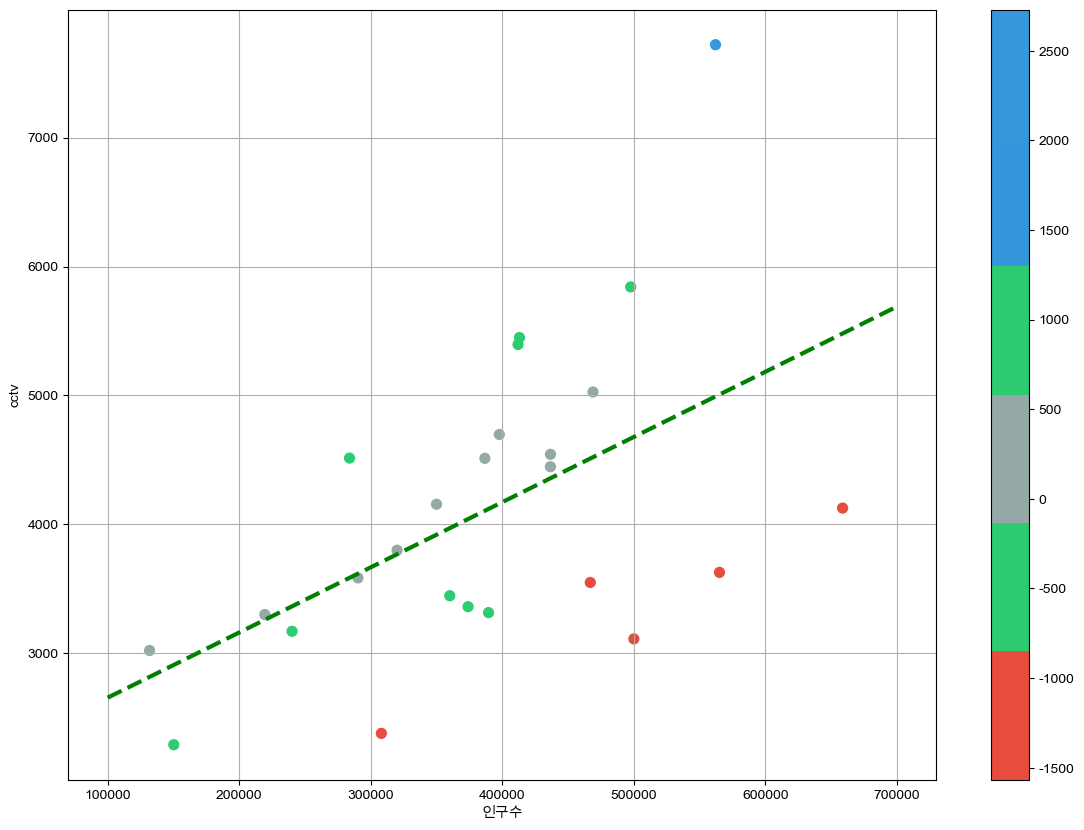

In [111]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['총 계'], s=50, c=data_result['오차'], cmap=my_cmap) # c=컬러 변화의 기준이 될 값
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.colorbar()
plt.grid(True)
plt.show()

#### 상위 5개, 하위 5개 구에 해당하는 점에 구의 이름 붙여주기

In [112]:
df_sort_f.index[0]

'강남구'

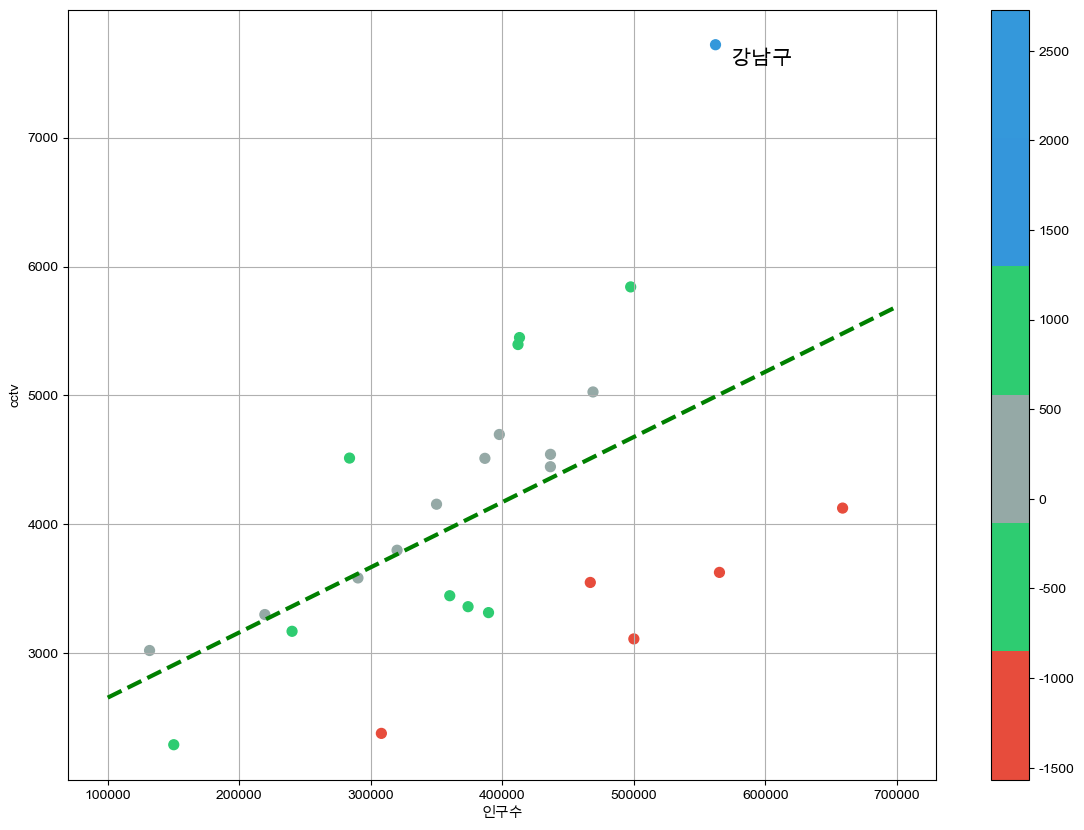

In [113]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['총 계'], s=50, c=data_result['오차'], cmap=my_cmap)  # x축=인구수, y축='총 계', s=점 사이즈
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.text(df_sort_f['인구수'][0] * 1.02, df_sort_f['총 계'][0] * 0.98, df_sort_f.index[0], fontsize=15)
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.colorbar()
plt.grid(True)
plt.show()

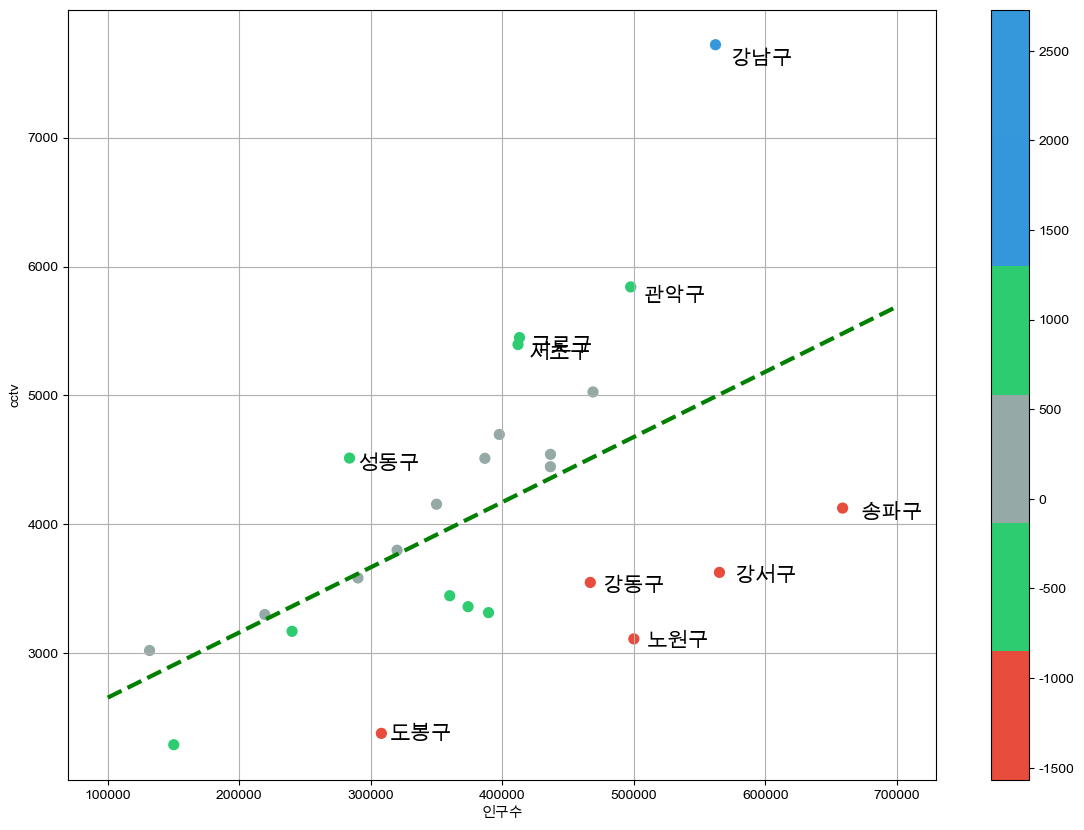

In [114]:
# for문을 이용하여 상위 5개, 하위 5개 구 이름 넣어주기

plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['총 계'], s=50, c=data_result['오차'], cmap=my_cmap)  # x축=인구수, y축='총 계', s=점 사이즈
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

# 상위 5개
for i in range(5) :
    plt.text(df_sort_f['인구수'][i] * 1.02, 
             df_sort_f['총 계'][i] * 0.98, 
             df_sort_f.index[i], 
             fontsize=15)
    
# 하위 5개
for i in range(5) :
    plt.text(df_sort_t['인구수'][i] * 1.02, 
             df_sort_t['총 계'][i] * 0.98, 
             df_sort_t.index[i], 
             fontsize=15)

plt.xlabel('인구수')
plt.ylabel('cctv')
plt.colorbar()
plt.grid(True)
plt.show()


---
## 7. 데이터 저장하기

In [115]:
data_result.to_csv("../data/data01/01.CCTV_result.csv", sep=',', encoding='utf-8')